In [1]:
!pip install mxnet-cu100

#MXNet (From Scratch)

In [1]:
import mxnet as mx
from mxnet import nd, autograd, gluon
import matplotlib.pyplot as plt

ctx = mx.gpu()

In [2]:
def transform(data):
    return data.reshape((784)).astype('float32')/255.0

train_mnist = gluon.data.vision.MNIST(train = True).transform_first(transform)

In [3]:
image, _ = train_mnist[1]
print(image.shape)

(784,)


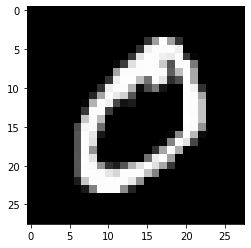

In [4]:
plt.imshow(image.reshape((28, 28)).asnumpy(), 'gray')
plt.show()

##Creating data loader for training and testing

In [0]:
batch_size = 64
training_data = gluon.data.DataLoader(train_mnist, batch_size = batch_size, shuffle = True)

##Building the GAN model

The GAN we are gonna build is a very toy model, so the final results are not gonna be earth shattering.

In [0]:
# ===================== Discriminator Parameters ===========================
dw1 = nd.random.normal(0, 1, (784, 128), ctx = ctx) * 0.001
db1 = nd.random.normal(0, 1, 128, ctx = ctx) * 0.001

dw2 = nd.random.normal(0, 1, (128, 1), ctx = ctx) * 0.001
db2 = nd.random.normal(0, 1, 1, ctx = ctx) * 0.001
# ==========================================================================

# ======================= Generator Parameters =============================
gw1 = nd.random.normal(0, 1, (100, 128), ctx = ctx) * 0.001
gb1 = nd.random.normal(0, 1, 128, ctx = ctx) * 0.001

gw2 = nd.random.normal(0, 1, (128, 784), ctx = ctx) * 0.001
gb2 = nd.random.normal(0, 1, 784, ctx = ctx) * 0.001
# ==========================================================================

def discriminator(x):
    layer1 = nd.relu(nd.dot(x, dw1) + db1)
    predicted = nd.sigmoid(nd.dot(layer1, dw2) + db2)
    return predicted

def generator(z):
    layer1 = nd.relu(nd.dot(z, gw1) + gb1)
    generated = nd.sigmoid(nd.dot(layer1, gw2) + gb2)
    return generated

dparams = [dw1, db1, dw2, db2]
gparams = [gw1, gb1, gw2, gb2]

# as we this is an scratch implementation, so we are gonna implement the optimizer from scratch too

dsqrs = [] # for adam optimizer
dvs = [] # for adam optimizer

gsqrs = [] # for adam optimizer
gvs = [] # for adam optimizer

for param in dparams:
    param.attach_grad()
    dsqrs.append(param.zeros_like() + 1e-5) # adding 1e-5 for computational stability
    dvs.append(param.zeros_like() + 1e-5) # adding 1e-5 for computational stability
    
for param in gparams:
    param.attach_grad()
    gsqrs.append(param.zeros_like() + 1e-5) # adding 1e-5 for computational stability
    gvs.append(param.zeros_like() + 1e-5) # adding 1e-5 for computational stability

In [0]:
def dloss(generated, true):
    return -nd.mean(nd.log(discriminator(true)) + nd.log(1 - discriminator(generated)))

def gloss(generated):
    return -nd.mean(nd.log(discriminator(generated)))

In [0]:
def adam(t, params, vs, sqrs, lr = 0.001):
    beta1 = 0.9
    beta2 = 0.999
    eps = 1e-8

    for param, v, sqr in zip(params, vs, sqrs):
        grad = param.grad / batch_size

        v[:] = beta1 * v + (1. - beta1) * grad
        sqr[:] = beta2 * sqr + (1. - beta2) * nd.square(grad + 1e-8)

        v_bias_corr = v / (1. - beta1 ** t)
        sqr_bias_corr = sqr / (1. - beta2 ** t)

        update = lr * v_bias_corr / (nd.sqrt(sqr_bias_corr + 1e-8) + eps)
        param[:] = param - update
        
def sgd(params, lr = 0.001):
    for param in params:
        param[:] = param - lr * param.grad

Epoch: 0 | Generator Loss: 2.33257 | Discirminator Loss: 0.80462


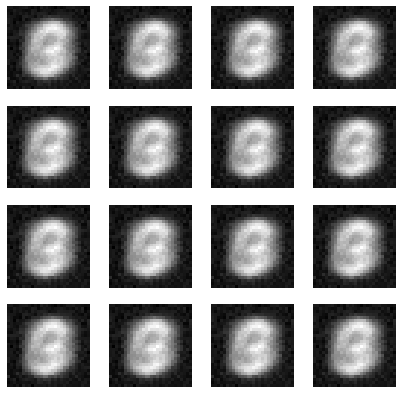

Epoch: 1 | Generator Loss: 5.88041 | Discirminator Loss: 0.01935


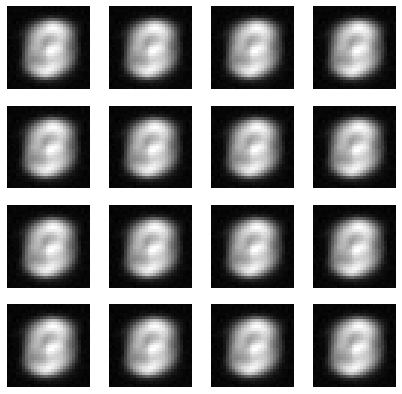

Epoch: 2 | Generator Loss: 4.07538 | Discirminator Loss: 0.20038


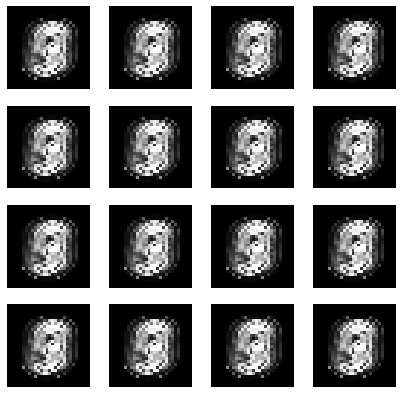

Epoch: 3 | Generator Loss: 2.72273 | Discirminator Loss: 0.26088


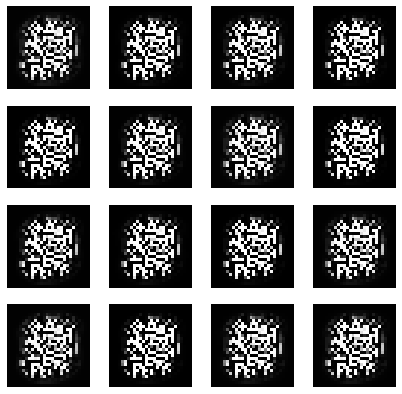

Epoch: 4 | Generator Loss: 5.73144 | Discirminator Loss: 0.01538


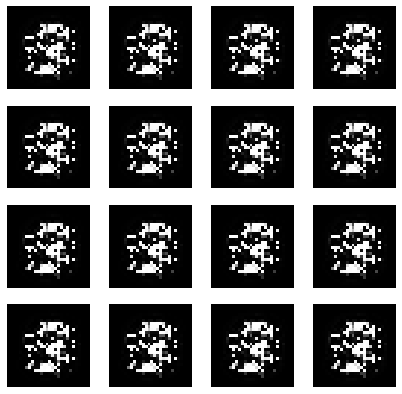

Epoch: 5 | Generator Loss: 4.55109 | Discirminator Loss: 0.06607


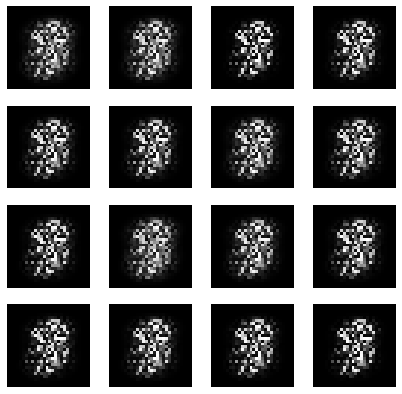

Epoch: 6 | Generator Loss: 2.67169 | Discirminator Loss: 0.24296


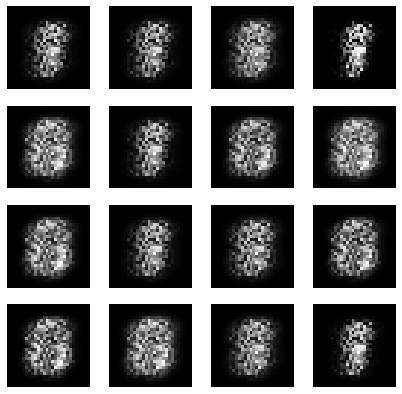

Epoch: 7 | Generator Loss: 3.75852 | Discirminator Loss: 0.15534


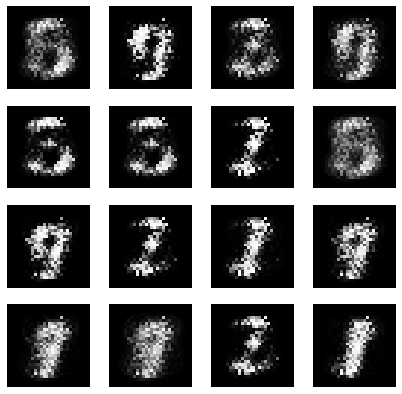

Epoch: 8 | Generator Loss: 3.44038 | Discirminator Loss: 0.18161


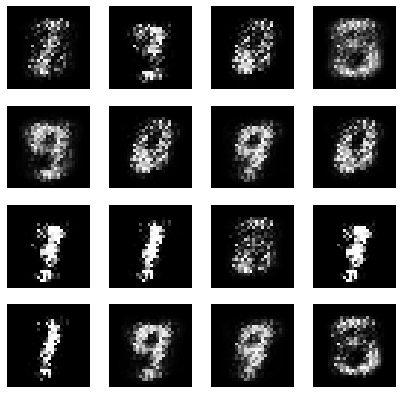

Epoch: 9 | Generator Loss: 3.13859 | Discirminator Loss: 0.28111


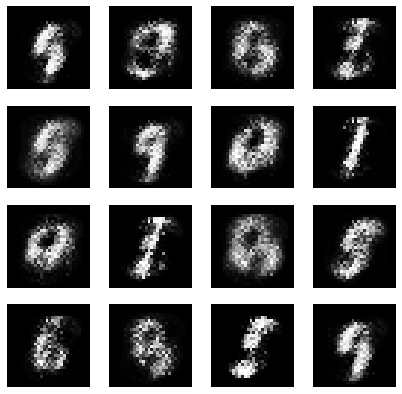

Epoch: 10 | Generator Loss: 3.64801 | Discirminator Loss: 0.36834


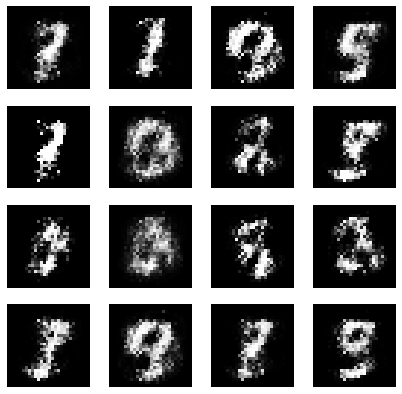

Epoch: 11 | Generator Loss: 3.59328 | Discirminator Loss: 0.42257


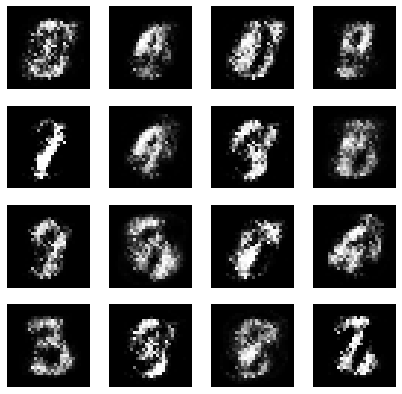

Epoch: 12 | Generator Loss: 3.43068 | Discirminator Loss: 0.53807


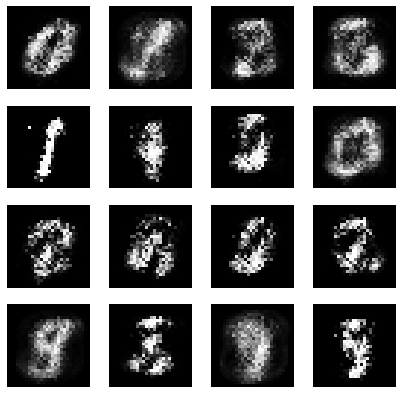

Epoch: 13 | Generator Loss: 3.02961 | Discirminator Loss: 0.68587


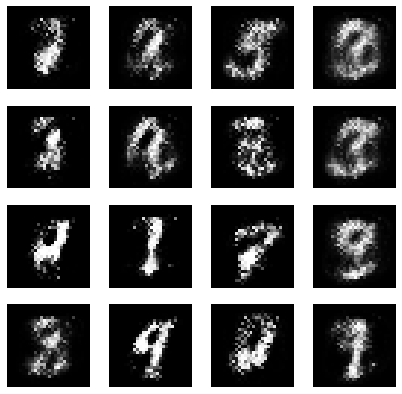

Epoch: 14 | Generator Loss: 2.66772 | Discirminator Loss: 0.68412


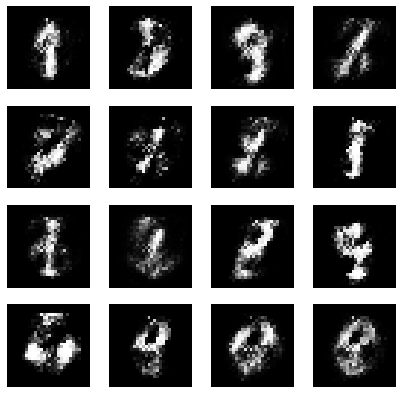

Epoch: 15 | Generator Loss: 2.56643 | Discirminator Loss: 0.74198


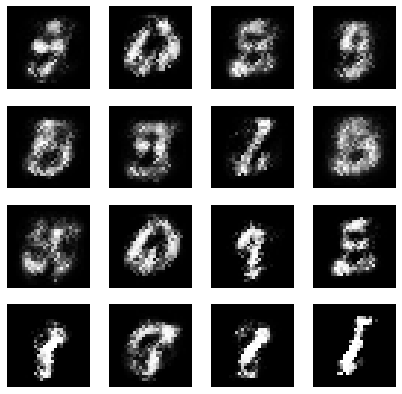

Epoch: 16 | Generator Loss: 2.84831 | Discirminator Loss: 0.78633


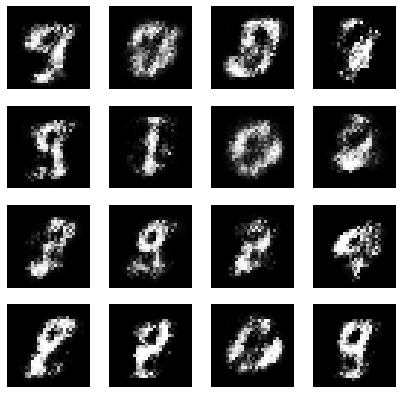

Epoch: 17 | Generator Loss: 2.92946 | Discirminator Loss: 0.87631


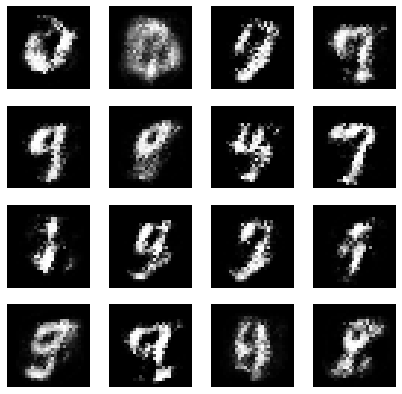

Epoch: 18 | Generator Loss: 2.62060 | Discirminator Loss: 0.84190


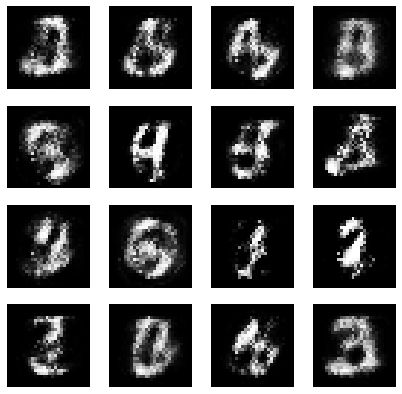

Epoch: 19 | Generator Loss: 2.58240 | Discirminator Loss: 0.87913


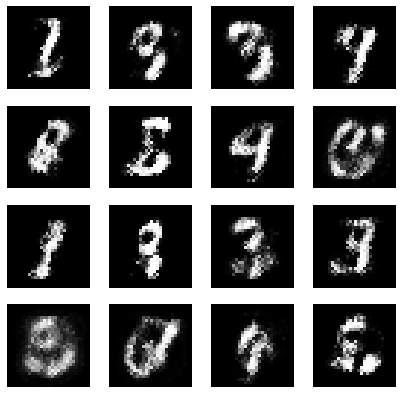

Epoch: 20 | Generator Loss: 2.33365 | Discirminator Loss: 0.92834


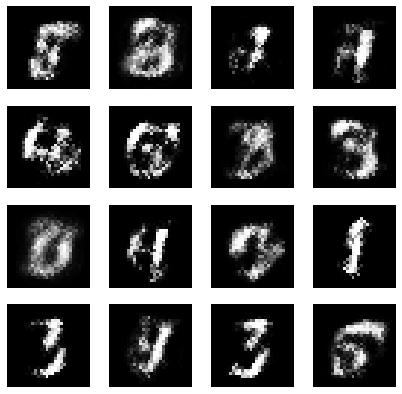

Epoch: 21 | Generator Loss: 2.32886 | Discirminator Loss: 0.97688


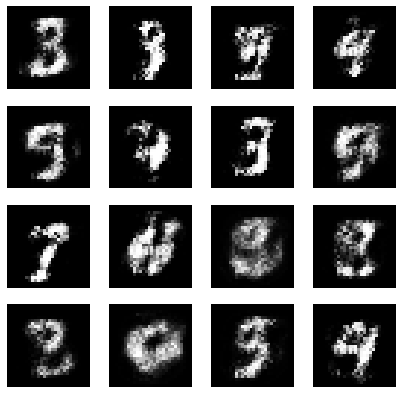

Epoch: 22 | Generator Loss: 2.24657 | Discirminator Loss: 0.95288


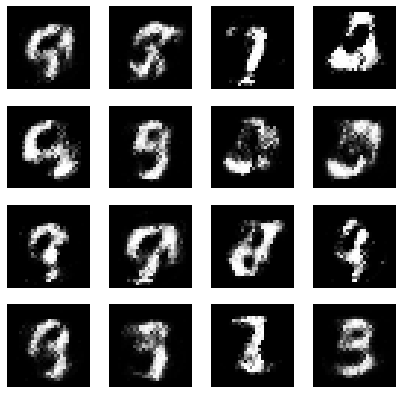

Epoch: 23 | Generator Loss: 1.99979 | Discirminator Loss: 1.00469


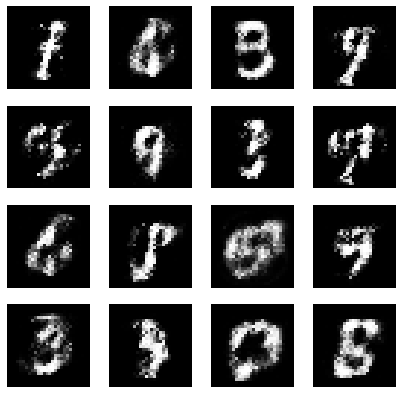

Epoch: 24 | Generator Loss: 2.01565 | Discirminator Loss: 0.97668


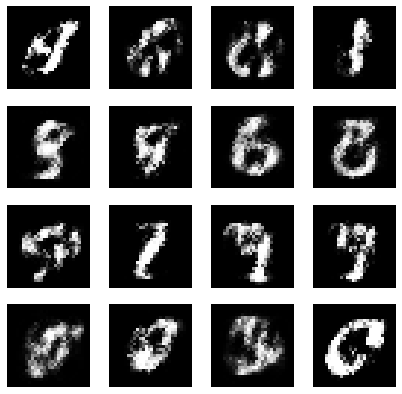

Epoch: 25 | Generator Loss: 1.91686 | Discirminator Loss: 0.99534


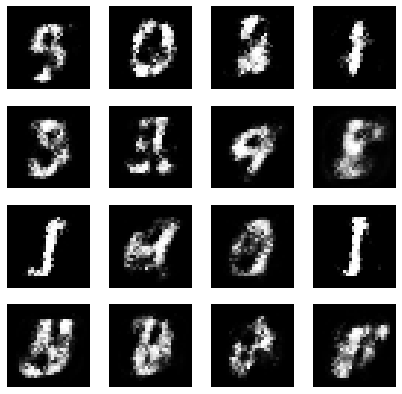

Epoch: 26 | Generator Loss: 1.90869 | Discirminator Loss: 0.95522


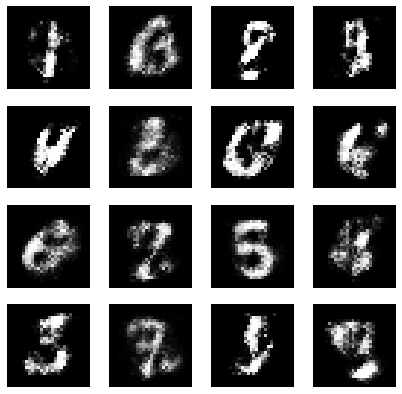

Epoch: 27 | Generator Loss: 1.87126 | Discirminator Loss: 0.97430


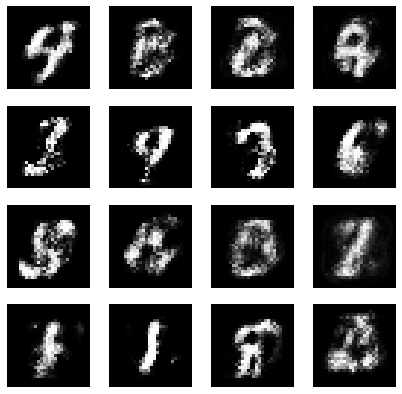

Epoch: 28 | Generator Loss: 1.78113 | Discirminator Loss: 0.98371


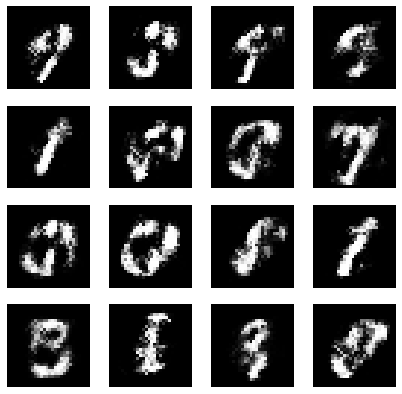

Epoch: 29 | Generator Loss: 1.75866 | Discirminator Loss: 0.97328


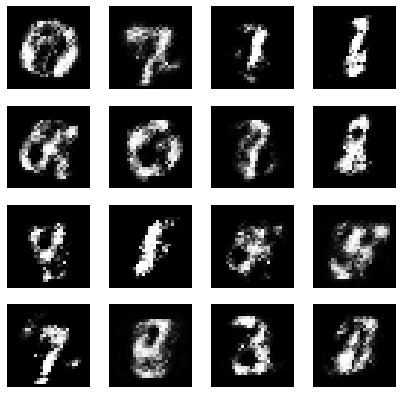

Epoch: 30 | Generator Loss: 1.74549 | Discirminator Loss: 0.95431


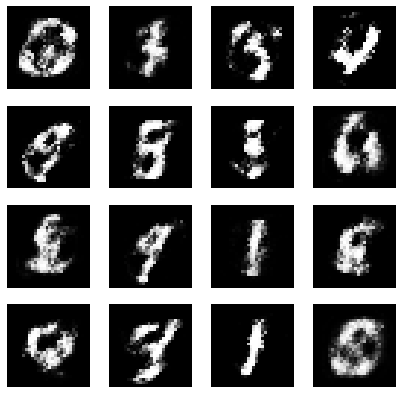

Epoch: 31 | Generator Loss: 1.68031 | Discirminator Loss: 0.95786


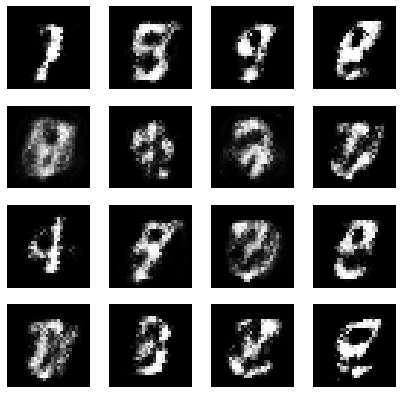

Epoch: 32 | Generator Loss: 1.64509 | Discirminator Loss: 0.95396


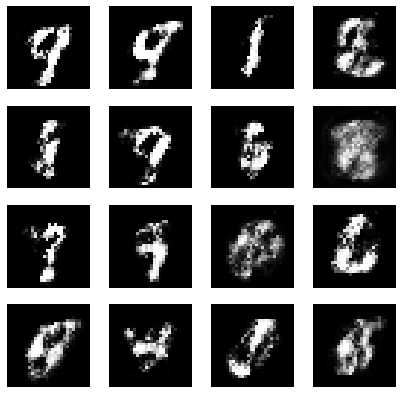

Epoch: 33 | Generator Loss: 1.56138 | Discirminator Loss: 1.00922


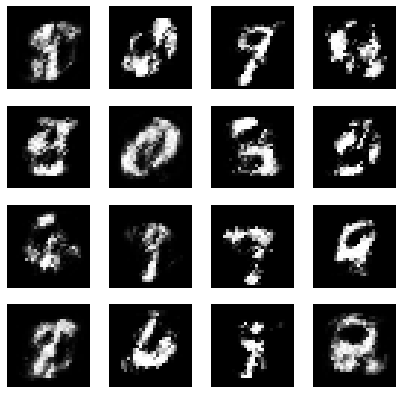

Epoch: 34 | Generator Loss: 1.52987 | Discirminator Loss: 1.00699


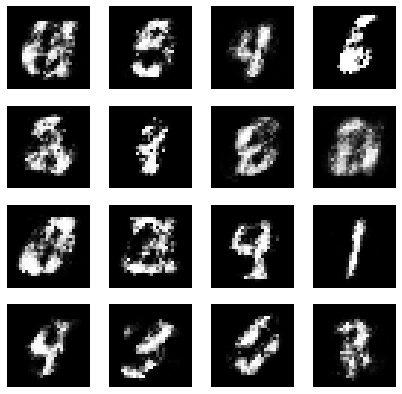

Epoch: 35 | Generator Loss: 1.46145 | Discirminator Loss: 1.03355


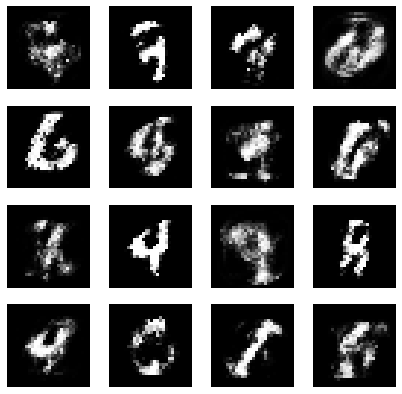

Epoch: 36 | Generator Loss: 1.43814 | Discirminator Loss: 1.01428


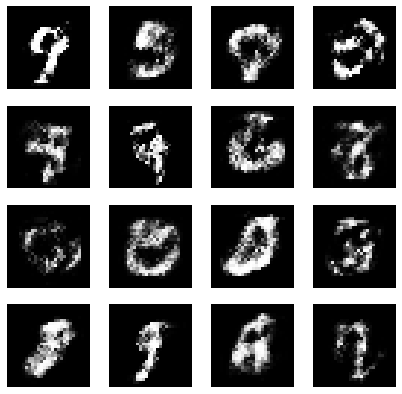

Epoch: 37 | Generator Loss: 1.43573 | Discirminator Loss: 1.00327


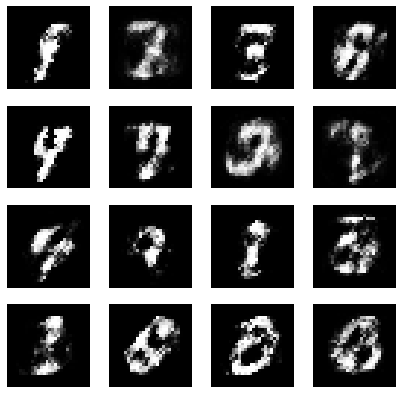

Epoch: 38 | Generator Loss: 1.39690 | Discirminator Loss: 1.02889


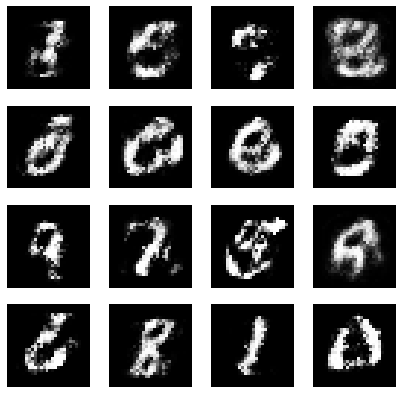

Epoch: 39 | Generator Loss: 1.39599 | Discirminator Loss: 1.03137


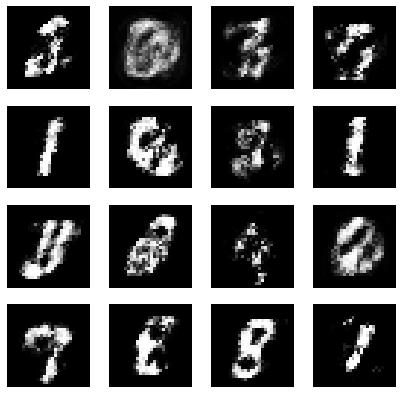

Epoch: 40 | Generator Loss: 1.40566 | Discirminator Loss: 1.03526


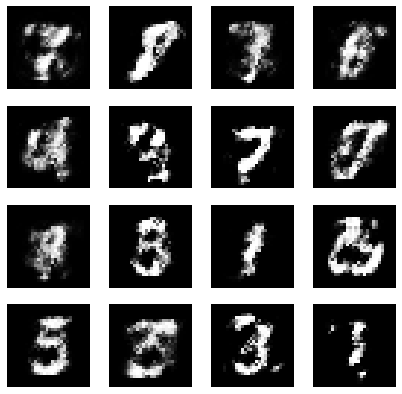

Epoch: 41 | Generator Loss: 1.37235 | Discirminator Loss: 1.01182


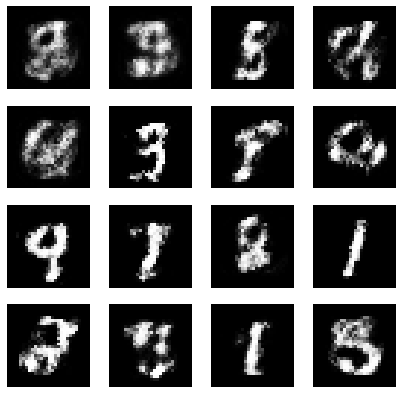

Epoch: 42 | Generator Loss: 1.34107 | Discirminator Loss: 1.00973


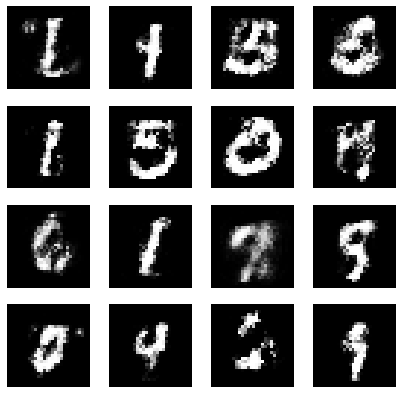

Epoch: 43 | Generator Loss: 1.37304 | Discirminator Loss: 0.97426


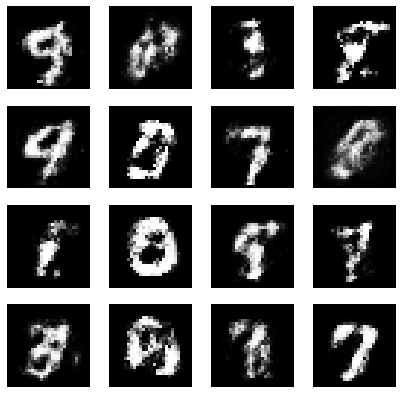

Epoch: 44 | Generator Loss: 1.42143 | Discirminator Loss: 1.00425


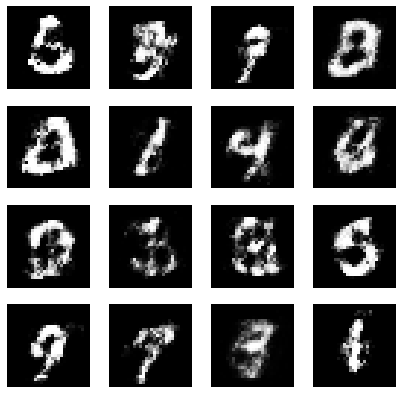

Epoch: 45 | Generator Loss: 1.34740 | Discirminator Loss: 1.02824


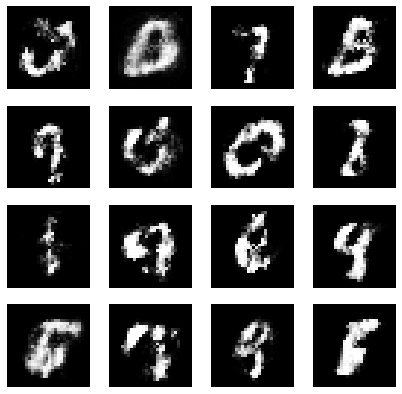

Epoch: 46 | Generator Loss: 1.38923 | Discirminator Loss: 1.02477


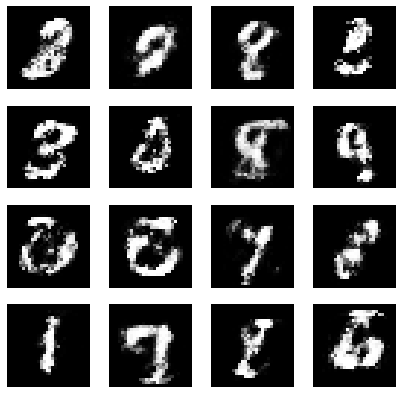

Epoch: 47 | Generator Loss: 1.36978 | Discirminator Loss: 1.04867


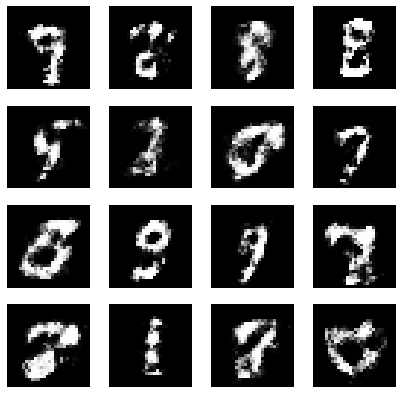

Epoch: 48 | Generator Loss: 1.35276 | Discirminator Loss: 1.04227


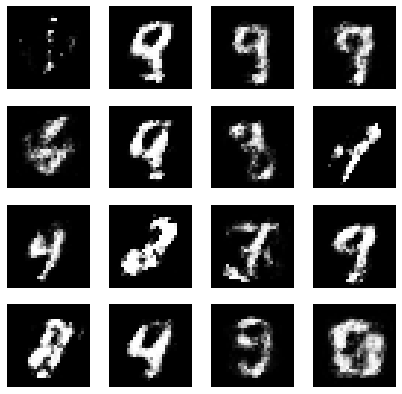

Epoch: 49 | Generator Loss: 1.28790 | Discirminator Loss: 1.05603


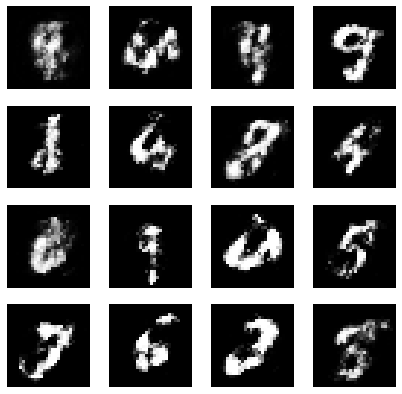

In [15]:
epochs = 50 # a gan usually takes a lot of epochs to work properly
num_batches = 60000//batch_size
learning_rate = 0.001

Glosses = []
Dlosses = []

t = 0
for epoch in range(epochs):
    gcum_loss = 0.0
    dcum_loss = 0.0
    for features, _ in training_data:
        # "features, _" because "_" are the labels of the features returned by training data loader,
        # which we don't need any more since we since we are going unsupervised generation of data, not classification
        t += 1
        features = features.as_in_context(ctx)
        z = nd.random.normal(0, 1, (features.shape[0], 100)).as_in_context(ctx)
        
        with autograd.record():
            generated = generator(z)
            Gloss = gloss(generated)
        Gloss.backward()
        adam(t, gparams, vs = gvs, sqrs = gsqrs, lr = learning_rate)
        
        with autograd.record():
            Dloss = dloss(generated, features)
        Dloss.backward()
        adam(t, dparams, vs = dvs, sqrs = dsqrs, lr = learning_rate)
        
        gcum_loss += Gloss
        dcum_loss += Dloss
    
    Gloss = gcum_loss.asscalar()/num_batches
    Dloss = dcum_loss.asscalar()/num_batches
    
    Glosses.append(Gloss)
    Dlosses.append(Dloss)
    
    print(f'Epoch: {epoch} | Generator Loss: {Gloss:.5f} | Discirminator Loss: {Dloss:.5f}')
    
    plt.figure(figsize = (7, 7))
    for i, image in enumerate(generated[:16], 1):
        plt.subplot(4, 4, i)
        plt.imshow(image.reshape((28, 28)).asnumpy(), cmap = 'gray')
        plt.axis('off')
    plt.show()

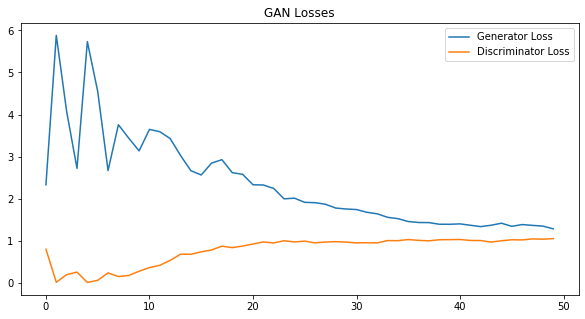

In [16]:
plt.figure(figsize = (10, 5))
plt.plot(Glosses, label = 'Generator Loss')
plt.plot(Dlosses, label = 'Discriminator Loss')
plt.legend()
plt.title('GAN Losses')
plt.show()